# Communities

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [2]:
# Load data

edge_df = pd.read_csv("data/edges.csv", delimiter=",")
node_df = pd.read_csv("data/nodes.csv", delimiter=",")

G = nx.from_pandas_edgelist(edge_df, source="# source", target=" target", create_using=nx.Graph())

In [3]:
from networkx.algorithms.community import asyn_lpa_communities, label_propagation_communities

In [4]:


asyn_lpa_communities(G)

<generator object asyn_lpa_communities at 0x7fcb71d45f90>

In [5]:
largest_cc = max(nx.connected_components(G), key=len)
LG = G.subgraph(largest_cc)
partition_LG = asyn_lpa_communities(LG)
type(partition_LG)

nx.number_of_nodes(LG)
nx.number_of_edges(LG)

13428

In [6]:
partition = label_propagation_communities(LG)
len(partition)

625

Metagraph is a Graph with 61 nodes and 505 edges
100%|██████████| 61/61 [00:00<00:00, 61.01it/s]


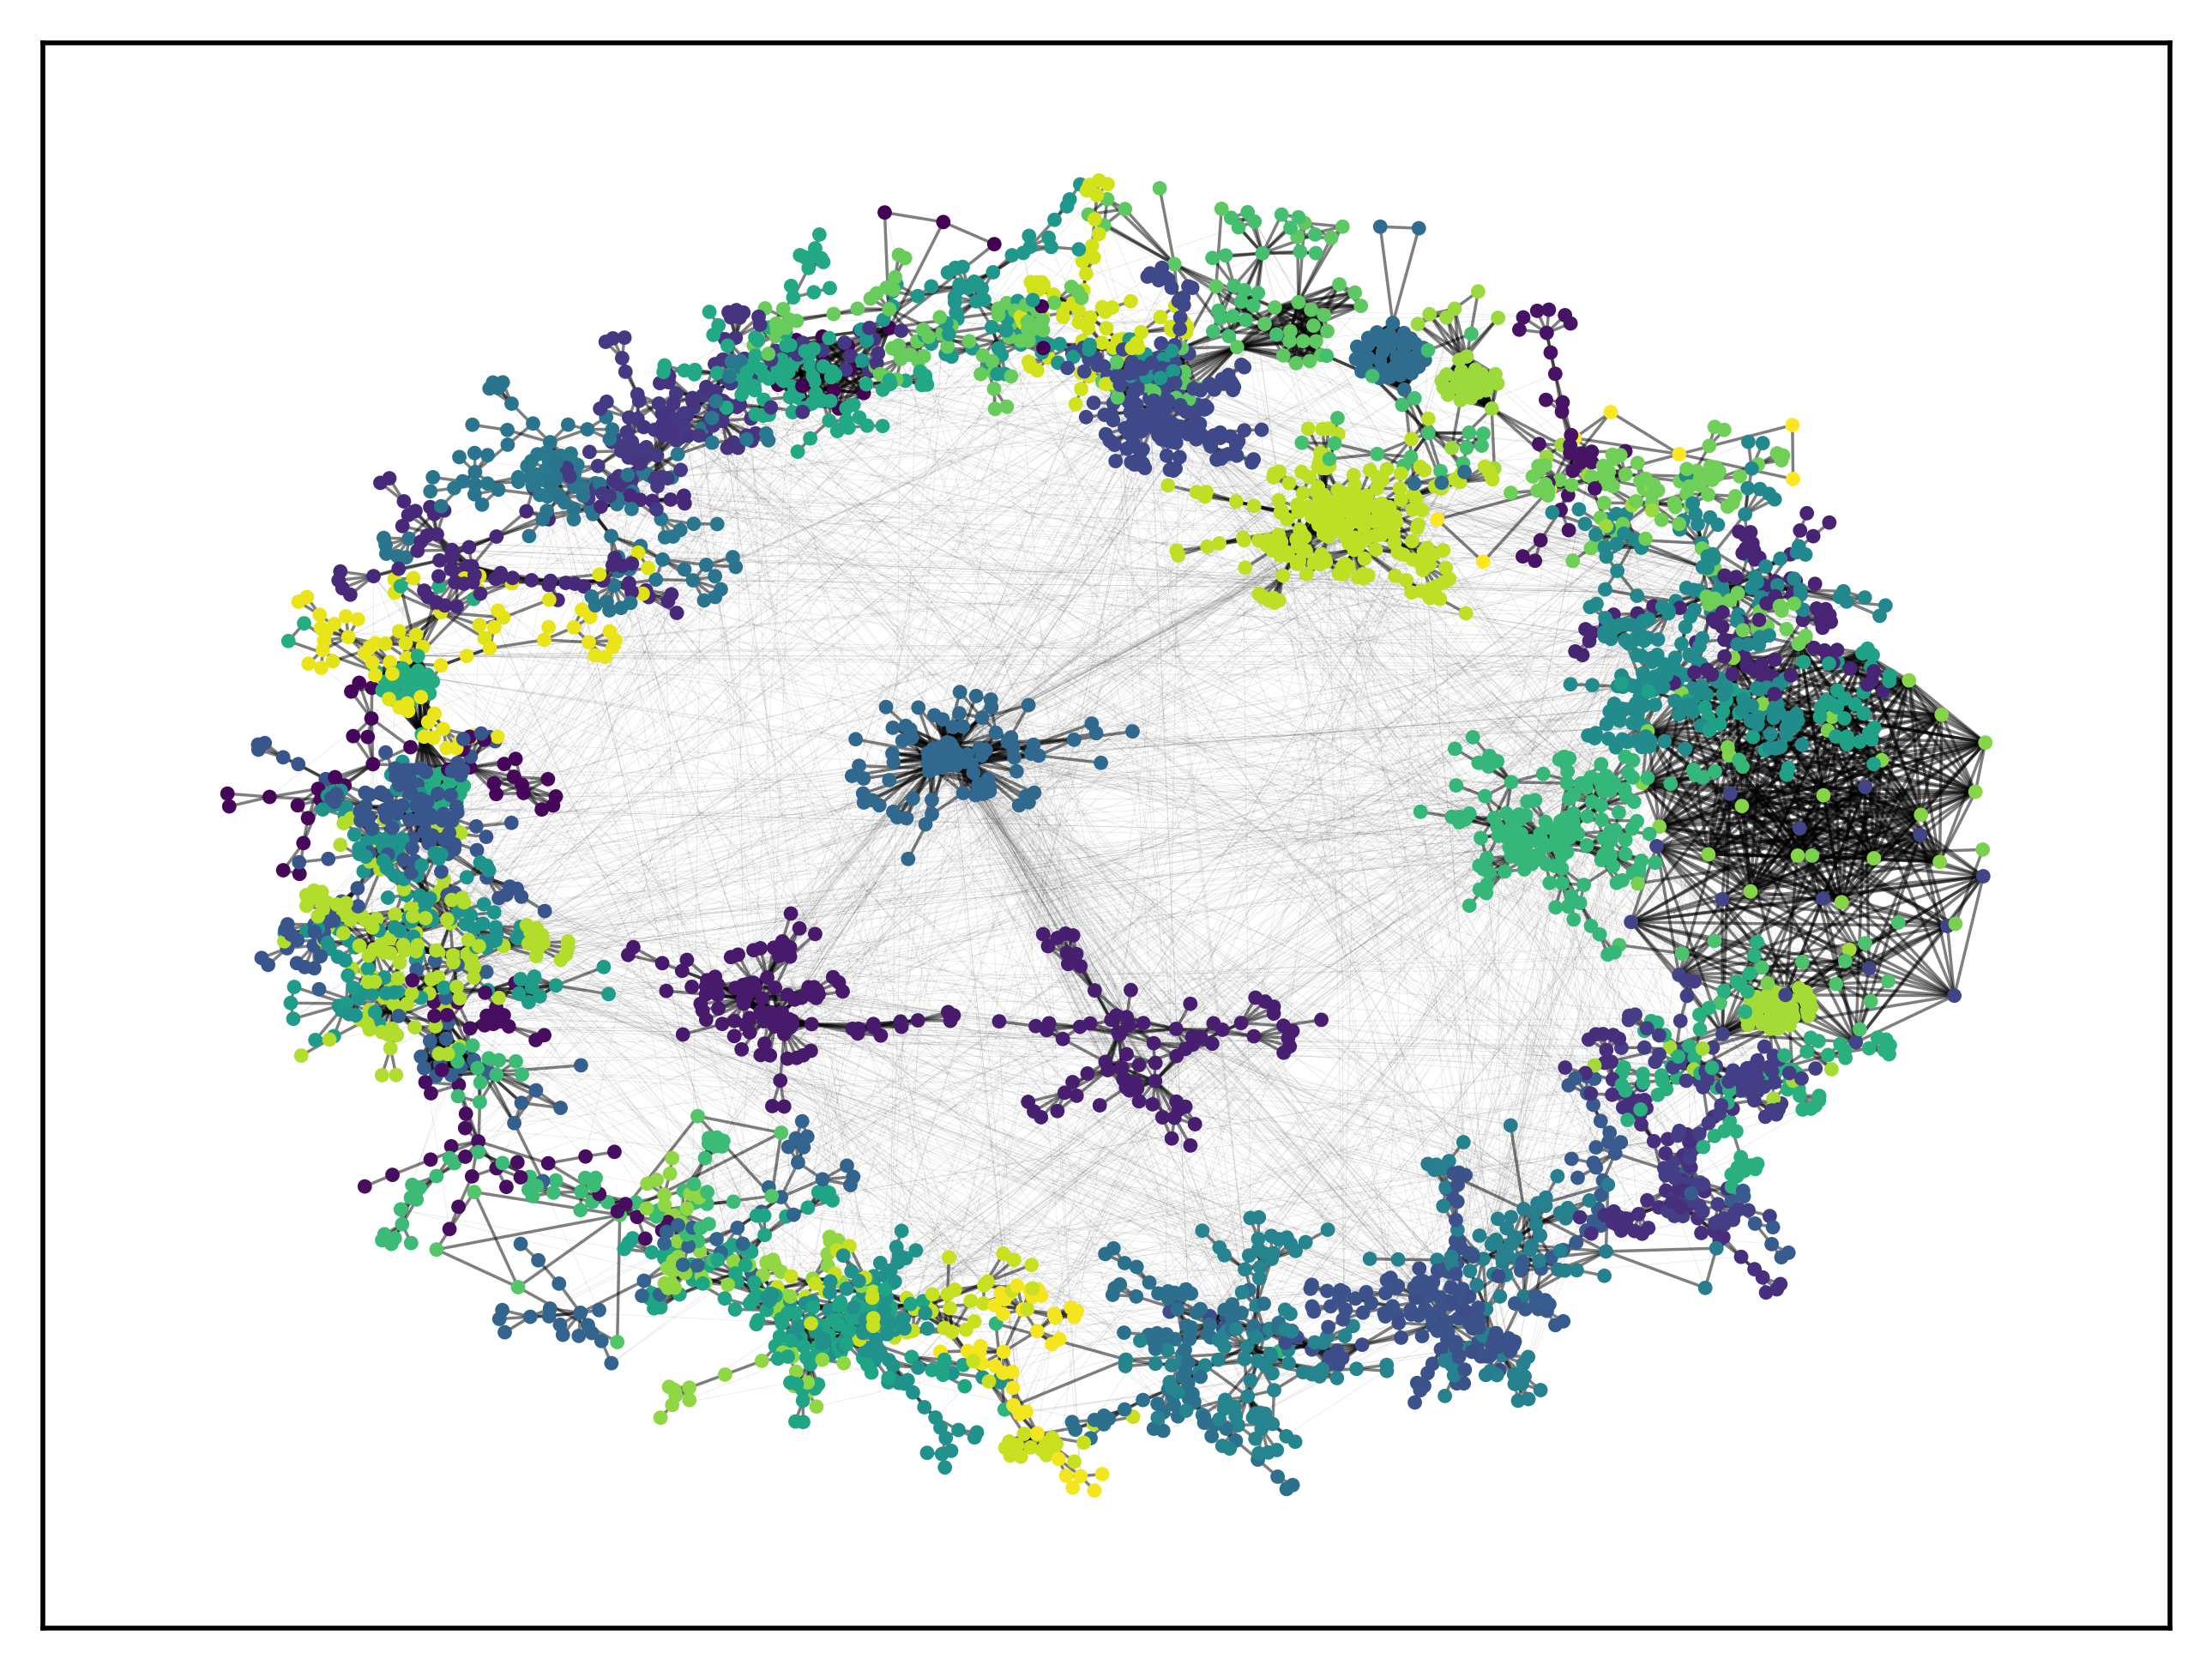

In [10]:
from scripts.layout_class import CommunityLayout
from networkx.algorithms import community

LG2 = nx.Graph(LG)
layout = CommunityLayout(LG2,
                community_compression = 0.25,
                layout_algorithm = nx.spring_layout,
                layout_kwargs = {"k":75, "iterations":1000},
                community_algorithm = community.louvain_communities,
                community_kwargs = {"resolution":2, "seed":None})
layout.display()


<generator object louvain_partitions at 0x7f44534686d0>


In [ ]:
from networkx.algorithms import community
len(list(community.asyn_lpa_communities(LG)))


663

In [ ]:
louvain = list(community.louvain_communities(LG, seed=10))
print(len(louvain))


41


{0: 'darkgrey',
 1: 'salmon',
 2: 'darkorchid',
 3: 'deepskyblue',
 4: 'whitesmoke',
 5: 'navy',
 6: 'lightgreen',
 7: 'limegreen',
 8: 'silver',
 9: 'darkkhaki',
 10: 'darkgrey',
 11: 'plum',
 12: 'cadetblue',
 13: 'dimgrey',
 14: 'khaki',
 15: 'teal',
 16: 'rebeccapurple',
 17: 'greenyellow',
 18: 'darkseagreen',
 19: 'yellow',
 20: 'aquamarine',
 21: 'burlywood',
 22: 'chartreuse',
 23: 'peru',
 24: 'blueviolet',
 25: 'antiquewhite',
 26: 'aliceblue',
 27: 'azure',
 28: 'lightsalmon',
 29: 'palevioletred',
 30: 'slateblue',
 31: 'coral',
 32: 'lavender',
 33: 'darkorange',
 34: 'mediumseagreen',
 35: 'slategray',
 36: 'dimgrey',
 37: 'turquoise',
 38: 'darkslategrey',
 39: 'aliceblue',
 40: 'thistle',
 41: 'blueviolet'}

In [ ]:
import numpy as np

lens = []
for i in louvain:
    lens.append(len(i))
print("smallest community: ", np.min(lens), "Largest community: ", np.max(lens))

smallest community:  7 Largest community:  234


Degree Assortativity

In [ ]:
#the similarity of connections in the graph with respect to the node degree
nx.degree_assortativity_coefficient(LG)

#the average degree of the 'area' in which a certain node resides
nx.average_neighbor_degree(LG)

#
nx.average_degree_connectivity(LG)

{6: 10.15040650406504,
 4: 10.115384615384615,
 3: 9.613905325443787,
 5: 9.702325581395348,
 1: 11.14074074074074,
 8: 10.349820143884893,
 21: 16.375,
 11: 11.334265734265735,
 22: 17.757575757575758,
 28: 18.05,
 49: 46.27040816326531,
 48: 51.104166666666664,
 55: 46.58181818181818,
 17: 16.22161422708618,
 56: 45.68452380952381,
 47: 51.9468085106383,
 65: 42.90769230769231,
 45: 47.095726495726495,
 54: 45.7962962962963,
 43: 46.18604651162791,
 46: 52.84782608695652,
 68: 40.64705882352941,
 77: 35.97402597402598,
 2: 9.5748730964467,
 57: 45.333333333333336,
 60: 43.63333333333333,
 62: 42.74193548387097,
 66: 41.43939393939394,
 44: 26.295454545454547,
 63: 41.93650793650794,
 81: 35.81481481481482,
 79: 33.89873417721519,
 67: 39.83582089552239,
 53: 47.84905660377358,
 51: 48.8921568627451,
 42: 39.330827067669176,
 7: 11.11204481792717,
 33: 31.25925925925926,
 18: 12.847222222222221,
 9: 12.801587301587302,
 10: 10.341304347826087,
 13: 11.46949602122016,
 14: 15.067669172